## Defining the Dataframe

In [1]:
import csv
import pandas as pd
from datetime import datetime
import postpatch_funcs as pf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='white', color_codes = True)
%matplotlib inline

In [2]:
pilot = pd.read_csv("1% Biocytin Pilot.csv")
pilot = pilot.loc[:,["date","lims_ID", "biocytin_percentage", "biocytin_fill_20x", "post_patch", "brain_region", "recording_duration", "well_ID","count"]]
pilot.head()

,date,lims_ID,biocytin_percentage,biocytin_fill_20x,post_patch,brain_region,recording_duration,well_ID,count
0,171201,Rbp4-Cre_KL100;Ai14-362155.04.02.01,0.5,n,no_seal,V1,NaN,Ephys_171127_03_B01_M,NaN
1,171201,Rbp4-Cre_KL100;Ai14-362155.04.02.02,0.5,y,nucleated,V1,NaN,Ephys_171127_03_B01_M,NaN
2,171201,Rbp4-Cre_KL100;Ai14-362155.04.02.03,0.5,y,nucleated,V1,NaN,Ephys_171127_03_B01_M,NaN
3,171201,Rbp4-Cre_KL100;Ai14-362155.04.02.04,2.0,n,no_seal,V1,NaN,Ephys_171127_03_B01_M,NaN
4,171201,Tac1-IRES2-Cre;Sst-IRES-FlpO;Ai65-360614.05.02.01,2.0,n,no_seal,V1,NaN,EPhys_171127_03_C03_M,NaN


In [3]:
report_card = pd.read_csv("custom_report.csv")
report_card.head()
new = report_card.loc[:,["cell_specimen_name","rna_amplification_qc", "ims63x_go_no_go", "project"]]
new.head()

,cell_specimen_name,rna_amplification_qc,ims63x_go_no_go,project
0,144147.03.01,NaN,NaN,T301
1,144147.04.01,NaN,NaN,T301
2,144147.05.01,NaN,NaN,T301
3,144149.07.01,NaN,NaN,T301
4,148873.03.01,NaN,NaN,T301


In [4]:
df = pd.merge(left = pilot, right = new, left_on = 'lims_ID', right_on = 'cell_specimen_name', how = 'inner')
df

,date,lims_ID,biocytin_percentage,biocytin_fill_20x,post_patch,brain_region,recording_duration,well_ID,count,cell_specimen_name,rna_amplification_qc,ims63x_go_no_go,project
0,171201,Rbp4-Cre_KL100;Ai14-362155.04.02.01,0.5,n,no_seal,V1,NaN,Ephys_171127_03_B01_M,NaN,Rbp4-Cre_KL100;Ai14-362155.04.02.01,passed,63x no go,mIVSCC-MET
1,171201,Rbp4-Cre_KL100;Ai14-362155.04.02.02,0.5,y,nucleated,V1,NaN,Ephys_171127_03_B01_M,NaN,Rbp4-Cre_KL100;Ai14-362155.04.02.02,passed,63x go,mIVSCC-MET
2,171201,Rbp4-Cre_KL100;Ai14-362155.04.02.03,0.5,y,nucleated,V1,NaN,Ephys_171127_03_B01_M,NaN,Rbp4-Cre_KL100;Ai14-362155.04.02.03,passed,63x go,mIVSCC-MET
3,171201,Rbp4-Cre_KL100;Ai14-362155.04.02.04,2.0,n,no_seal,V1,NaN,Ephys_171127_03_B01_M,NaN,Rbp4-Cre_KL100;Ai14-362155.04.02.04,passed,63x no go,mIVSCC-MET
4,171201,Tac1-IRES2-Cre;Sst-IRES-FlpO;Ai65-360614.05.02.01,2.0,n,no_seal,V1,NaN,EPhys_171127_03_C03_M,NaN,Tac1-IRES2-Cre;Sst-IRES-FlpO;Ai65-360614.05.02.01,failed,NaN,mIVSCC-MET
5,171201,Htr3a-Cre_NO152;Ai14-362742.04.01.01,2.0,a plume,outside_out,V1,NaN,EPhys_171127_03_A05_M,NaN,Htr3a-Cre_NO152;Ai14-362742.04.01.01,passed,63x go,mIVSCC-MET
6,171201,Htr3a-Cre_NO152;Ai14-362742.04.01.02,0.5,y,nucleated,V1,NaN,EPhys_171127_03_A05_M,NaN,Htr3a-Cre_NO152;Ai14-362742.04.01.02,passed,NaN,mIVSCC-MET
7,171201,Ndnf-IRES2-dgCre;Ai14-361703.04.01.01,0.5,q,nucleated,V1,NaN,EPhys_171127_03_B03_M,NaN,Ndnf-IRES2-dgCre;Ai14-361703.04.01.01,passed,63x go,mIVSCC-MET
8,171201,Ndnf-IRES2-dgCre;Ai14-361703.04.01.02,2.0,a plume,outside_out,V1,NaN,EPhys_171127_03_B03_M,NaN,Ndnf-IRES2-dgCre;Ai14-361703.04.01.02,failed,NaN,mIVSCC-MET
9,171201,Ndnf-IRES2-dgCre;Ai14-361703.06.02.01,2.0,n,partial_nucleated,V1,NaN,EPhys_171127_03_B05_M,NaN,Ndnf-IRES2-dgCre;Ai14-361703.06.02.01,failed,NaN,mIVSCC-MET


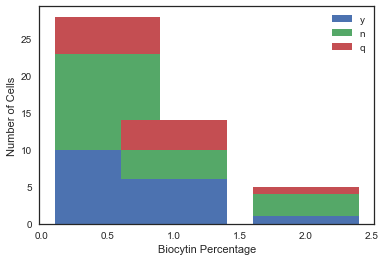

In [5]:
#df["biocytin_percentage"] = df["biocytin_percentage"].astype(str)
#x = ["0.5","1.0","2.0"]
x = [0.5,1,2]

fill = ['y', 'n', 'q']

bottom = np.zeros(len(x))
y = np.zeros(len(x))
for p in fill:
    bottom = bottom + y
    y = [len(df[(df['biocytin_percentage'] == f) & (df['biocytin_fill_20x'] == p)]) for f in x]
    plt.bar(x, y, bottom = bottom, label = p)
    

plt.xlabel('Biocytin Percentage')
plt.ylabel('Number of Cells')
plt.legend()

In [6]:
df = df.loc[:,["biocytin_percentage","biocytin_fill_20x", "date"]]
df2 = df.groupby(["biocytin_percentage","biocytin_fill_20x"]).count()
df2



date
biocytin_percentage biocytin_fill_20x      
0.5                 a plume               2
                    n                    13
                    q                     5
                    y                    10
1.0                 a plume               5
                    n                     4
                    q                     4
                    y                     6
2.0                 a plume               3
                    n                     3
                    q                     1
                    y                     1

In [7]:
df2 = df2.reset_index()
df2

,biocytin_percentage,biocytin_fill_20x,date
0,0.5,a plume,2
1,0.5,n,13
2,0.5,q,5
3,0.5,y,10
4,1.0,a plume,5
5,1.0,n,4
6,1.0,q,4
7,1.0,y,6
8,2.0,a plume,3
9,2.0,n,3


In [8]:
df2 = df2.rename(columns = {"biocytin_fill_20x": ''})
df2

,biocytin_percentage,,date
0,0.5,a plume,2
1,0.5,n,13
2,0.5,q,5
3,0.5,y,10
4,1.0,a plume,5
5,1.0,n,4
6,1.0,q,4
7,1.0,y,6
8,2.0,a plume,3
9,2.0,n,3


In [9]:
df2 = df2.pivot_table(values=[''], index=['biocytin_percentage'], columns=[''], aggfunc='sum')
df2.fillna(0,inplace =True)
df2

date           
                    a plume   n  q   y
biocytin_percentage                   
0.5                       2  13  5  10
1.0                       5   4  4   6
2.0                       3   3  1   1

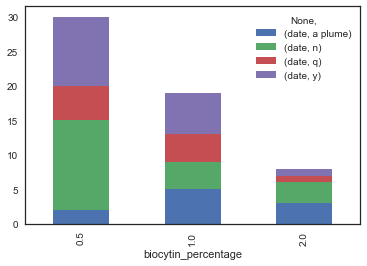

In [10]:
df2.plot(kind = "bar", stacked = True)

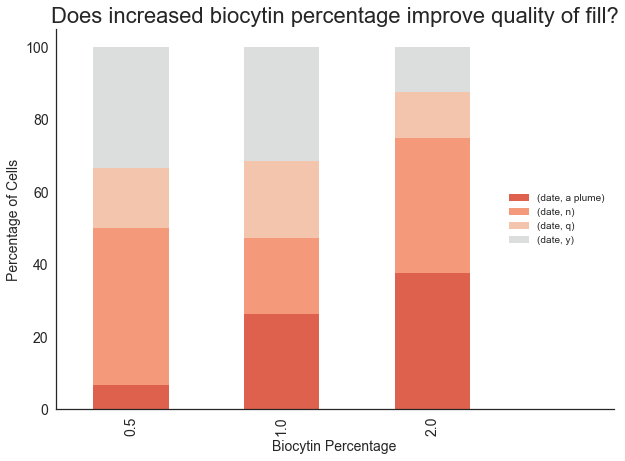

In [11]:
df3 = df2.div(df2.sum(1), axis=0)*100
colo=['midnightblue', 'cornflowerblue', '#D0BBFF', "#FF9F9A","#FF9F9A","#FF9F9A"]
colors = sns.color_palette("coolwarm_r", 7)
df3.plot(kind = "bar", stacked = True, figsize=(10,7), fontsize= 14, color = colors)
plt.title("Does increased biocytin percentage improve quality of fill?", fontsize= 22, loc = "center")
plt.legend( loc = 'center right')
plt.ylabel("Percentage of Cells", fontsize= 14)
plt.xlabel("Biocytin Percentage", fontsize = 14,)
plt.xlim(-0.5,3.2)

sns.despine()

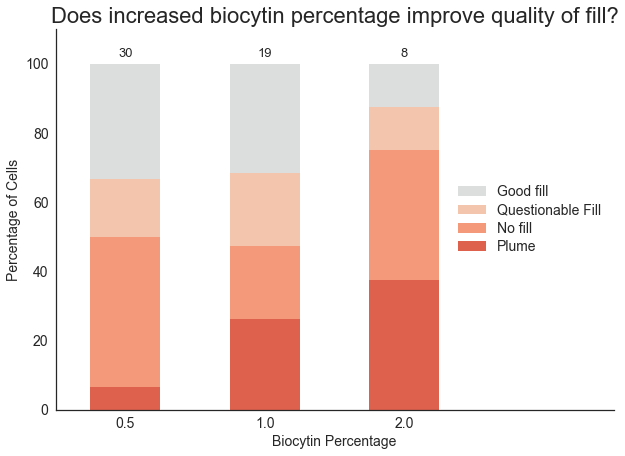

In [12]:
df3 = df2.div(df2.sum(1), axis=0)*100
colors = sns.color_palette("coolwarm_r", 7)
ax1= df3.plot(kind = "bar", stacked = True, figsize=(10,7), fontsize= 14, color = colors)
plt.title("Does increased biocytin percentage improve quality of fill?", fontsize= 22, loc = "center")
plt.legend(["Plume", "No fill", "Questionable Fill", "Good fill"] ,loc = 'center right',labelspacing=-2.3, fontsize =14)
plt.ylabel("Percentage of Cells", fontsize= 14)
plt.xlabel("Biocytin Percentage", fontsize = 14)
plt.xlim(-0.5,3.5)
plt.ylim(0,110)
plt.xticks(rotation=0)
sns.despine()

#to add totals above
rects = ax1.patches
totals = df2.sum(1)
labels = totals
labels = pd.to_numeric(labels, errors='raise', downcast='integer')
for rect, label in zip (rects, labels):
    y_value = 101
    x_value = rect.get_x() + rect.get_width() / 2
    ax1.text(x_value, y_value, label, ha='center', va='bottom', size=13)

plt.savefig("C:/users/lindsayn/documents/github/analysis/figures/biocytin_stacked_bar", dpi=100)
